<a href="https://colab.research.google.com/github/Avi9530/21Project21Days/blob/main/8CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

Load CIFAR-100 Dataset

In [27]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


**Preprocess the Data**

Normalize Pixel Values

In [28]:
cifar100_train_images = cifar100_train_images.astype('float32') / 255.0
cifar100_test_images  = cifar100_test_images.astype('float32') / 255.0


In [34]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(cifar100_train_labels,100)
y_test_cat  = to_categorical(cifar100_test_labels,100)

Verify Shapes

In [31]:
print("Training images:", cifar100_train_images.shape)
print("Training labels:", y_train_cat.shape)
print("Test images:", cifar100_test_images.shape)
print("Test labels:", y_test_cat.shape)


Training images: (50000, 32, 32, 3)
Training labels: (50000, 100)
Test images: (10000, 32, 32, 3)
Test labels: (50000, 100)


**Artificial Neural Network (ANN)**

ANN is used as a baseline. It ignores spatial structure, so performance will be limited.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='softmax')
])

ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

**Convolutional Neural Network (CNN)**

CNN is essential for CIFAR-100 due to spatial and color complexity.

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 690,564 (2.63 MB)

 Trainable params: 690,116 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

***Model Training***

**Callbacks**
 (Early Stopping & Checkpointing)

Train ANN

Train CNN

**Model Evaluation**

Test Performance

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_cnn_model.h5',
    monitor='val_accuracy',
    save_best_only=True
)
history_ann = ann_model.fit(
    cifar100_train_images, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
history_cnn = cnn_model.fit(
    cifar100_train_images, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.0237 - loss: 4.5461 - val_accuracy: 0.0700 - val_loss: 4.1123
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.0586 - loss: 4.1660 - val_accuracy: 0.0962 - val_loss: 3.9854
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.0708 - loss: 4.0513 - val_accuracy: 0.1007 - val_loss: 3.9009
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.0801 - loss: 3.9839 - val_accuracy: 0.1265 - val_loss: 3.8123
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.0891 - loss: 3.9262 - val_accuracy: 0.1281 - val_loss: 3.7690
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.0954 - loss: 3.8753 - val_accuracy: 0.1393 - val_loss: 3.7197
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.1065 - loss: 3.8494 - val_accuracy: 0.1401 - val_loss: 3.7079
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.1052 - loss: 3.8260 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 282s 889ms/step - accuracy: 0.0435 - loss: 4.5298 - val_accuracy: 0.0380 - val_loss: 4.6443
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.1078 - loss: 3.8627

313/313 ━━━━━━━━━━━━━━━━━━━━ 289s 925ms/step - accuracy: 0.1078 - loss: 3.8624 - val_accuracy: 0.1853 - val_loss: 3.3903
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.1652 - loss: 3.4989

313/313 ━━━━━━━━━━━━━━━━━━━━ 277s 884ms/step - accuracy: 0.1653 - loss: 3.4987 - val_accuracy: 0.2349 - val_loss: 3.1179
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.2126 - loss: 3.1953

313/313 ━━━━━━━━━━━━━━━━━━━━ 282s 900ms/step - accuracy: 0.2126 - loss: 3.1952 - val_accuracy: 0.2711 - val_loss: 2.9278
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.2567 - loss: 2.9524

313/313 ━━━━━━━━━━━━━━━━━━━━ 287s 918ms/step - accuracy: 0.2567 - loss: 2.9524 - val_accuracy: 0.3206 - val_loss: 2.6930
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.2833 - loss: 2.7825

313/313 ━━━━━━━━━━━━━━━━━━━━ 276s 882ms/step - accuracy: 0.2834 - loss: 2.7825 - val_accuracy: 0.3325 - val_loss: 2.5998
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.3280 - loss: 2.5826

313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 877ms/step - accuracy: 0.3280 - loss: 2.5827 - val_accuracy: 0.3619 - val_loss: 2.4945
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.3606 - loss: 2.4289

313/313 ━━━━━━━━━━━━━━━━━━━━ 275s 879ms/step - accuracy: 0.3606 - loss: 2.4289 - val_accuracy: 0.3812 - val_loss: 2.4116
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 325s 887ms/step - accuracy: 0.3894 - loss: 2.2755 - val_accuracy: 0.3668 - val_loss: 2.4529
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855ms/step - accuracy: 0.4164 - loss: 2.1416

313/313 ━━━━━━━━━━━━━━━━━━━━ 288s 921ms/step - accuracy: 0.4164 - loss: 2.1417 - val_accuracy: 0.4076 - val_loss: 2.3103
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.4460 - loss: 1.9991

313/313 ━━━━━━━━━━━━━━━━━━━━ 278s 889ms/step - accuracy: 0.4460 - loss: 1.9992 - val_accuracy: 0.4136 - val_loss: 2.3101
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 277s 884ms/step - accuracy: 0.4712 - loss: 1.8961 - val_accuracy: 0.4027 - val_loss: 2.3322
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.4991 - loss: 1.7659

313/313 ━━━━━━━━━━━━━━━━━━━━ 335s 925ms/step - accuracy: 0.4991 - loss: 1.7661 - val_accuracy: 0.4392 - val_loss: 2.1558
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 322s 925ms/step - accuracy: 0.5179 - loss: 1.6694 - val_accuracy: 0.4192 - val_loss: 2.2929
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 278s 889ms/step - accuracy: 0.5451 - loss: 1.5650 - val_accuracy: 0.4279 - val_loss: 2.2906
Epoch 16/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.5711 - loss: 1.4604

313/313 ━━━━━━━━━━━━━━━━━━━━ 324s 895ms/step - accuracy: 0.5710 - loss: 1.4605 - val_accuracy: 0.4418 - val_loss: 2.2767
Epoch 17/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.5975 - loss: 1.3572

313/313 ━━━━━━━━━━━━━━━━━━━━ 272s 868ms/step - accuracy: 0.5974 - loss: 1.3574 - val_accuracy: 0.4482 - val_loss: 2.2534
Epoch 18/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.6132 - loss: 1.2942

313/313 ━━━━━━━━━━━━━━━━━━━━ 330s 896ms/step - accuracy: 0.6132 - loss: 1.2943 - val_accuracy: 0.4576 - val_loss: 2.2188


In [38]:
ann_test_loss, ann_test_acc = ann_model.evaluate(cifar100_test_images, y_test_cat)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(cifar100_test_images, y_test_cat)

print("ANN Test Accuracy:", ann_test_acc)
print("CNN Test Accuracy:", cnn_test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1707 - loss: 3.5911
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.4497 - loss: 2.0968
ANN Test Accuracy: 0.17059999704360962
CNN Test Accuracy: 0.4449999928474426


Training History Visualization

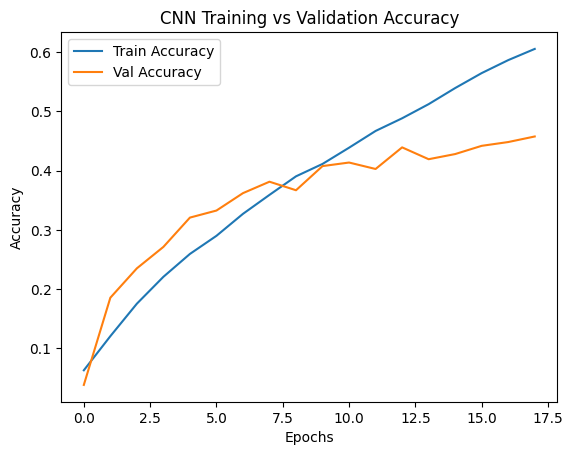

In [39]:
import matplotlib.pyplot as plt
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()


Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step


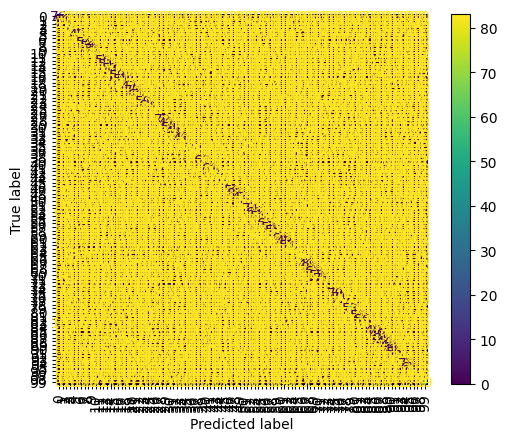

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(cnn_model.predict(cifar100_test_images), axis=1)
cm = confusion_matrix(cifar100_test_labels.flatten(), y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(xticks_rotation=90)
plt.show()


**Prediction Analysis**

Visualize Predictions

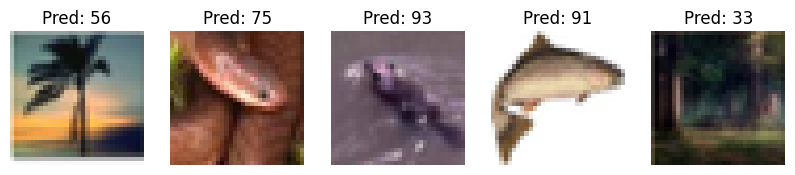

In [41]:
import random

class_names = [str(i) for i in range(100)]

plt.figure(figsize=(10,5))
for i in range(5):
    idx = random.randint(0, len(cifar100_test_images)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(cifar100_test_images[idx])
    plt.title(f"Pred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.show()


## Final Analysis

- The ANN struggled due to loss of spatial information.
- CNN significantly outperformed ANN by learning spatial and color patterns.
- Deeper CNN layers improved feature extraction for complex classes.
- CIFAR-100 is significantly harder than Fashion-MNIST due to:
  - 100 classes
  - Color images
  - High inter-class similarity

### Limitations
- Training is computationally expensive
- Accuracy is limited without transfer learning (e.g., ResNet)

### Conclusion
Model complexity and architecture choice play a critical role when moving from
simple grayscale datasets (Fashion-MNIST) to complex color datasets (CIFAR-100).
CNNs are essential for high-dimensional image classification tasks.
